In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_datagen = ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 rotation_range=5,
                                 shear_range=0.3,
                                 zoom_range=[0.9,2.2],
                                 fill_mode='nearest')

Found 18 images belonging to 3 classes.


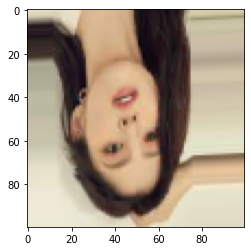

[1. 0. 0.]


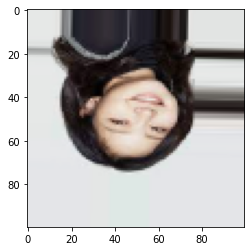

[0. 1. 0.]


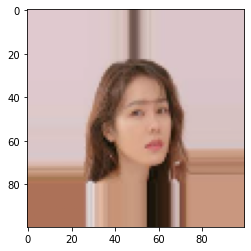

[0. 0. 1.]


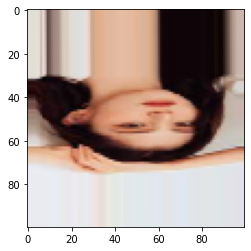

[1. 0. 0.]


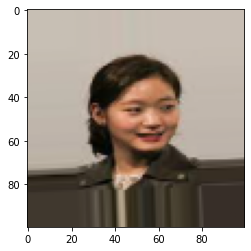

[0. 1. 0.]


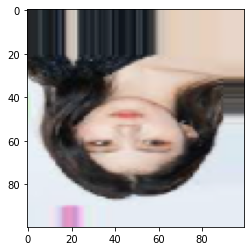

[1. 0. 0.]


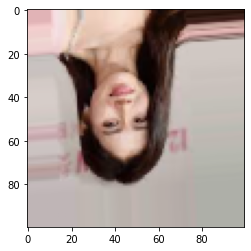

[0. 0. 1.]


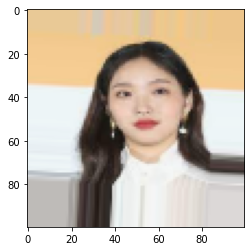

[0. 1. 0.]


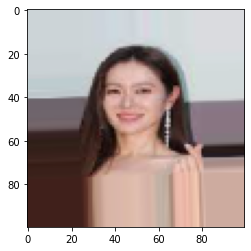

[0. 0. 1.]


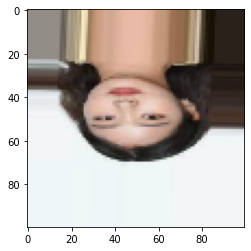

[0. 1. 0.]


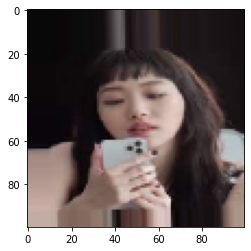

[0. 1. 0.]


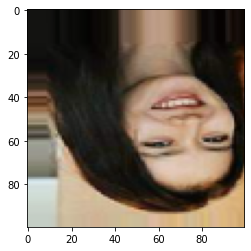

[0. 0. 1.]


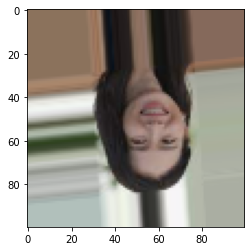

[0. 0. 1.]


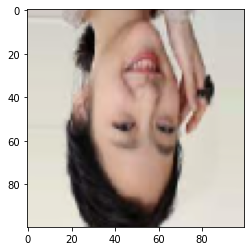

[0. 1. 0.]


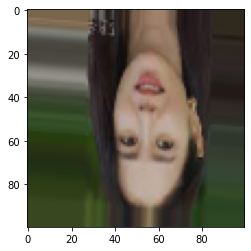

[0. 0. 1.]


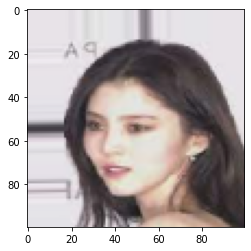

[1. 0. 0.]


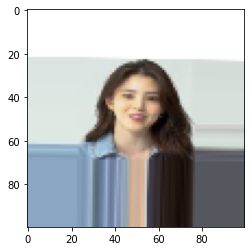

[1. 0. 0.]


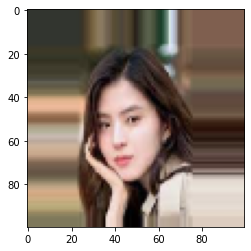

[1. 0. 0.]


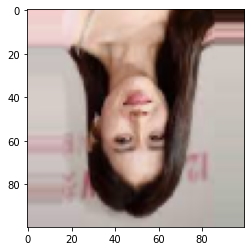

[0. 0. 1.]


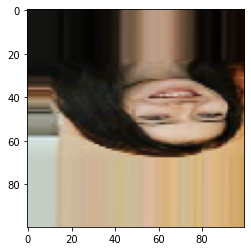

[0. 0. 1.]


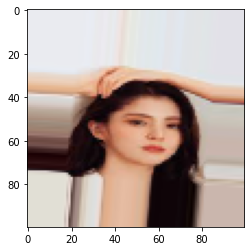

[1. 0. 0.]


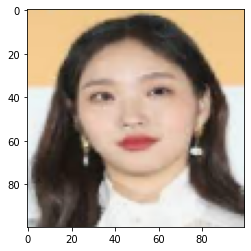

[0. 1. 0.]


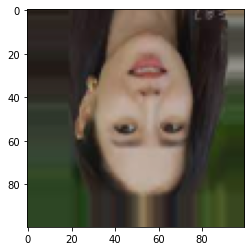

[0. 0. 1.]


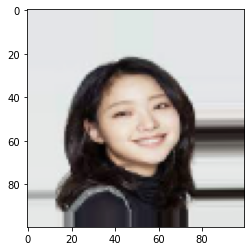

[0. 1. 0.]


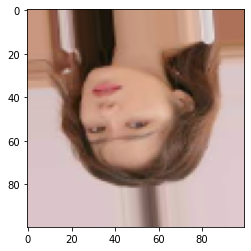

[0. 0. 1.]


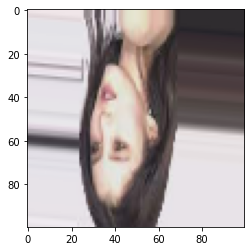

[1. 0. 0.]


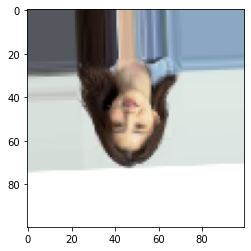

[1. 0. 0.]


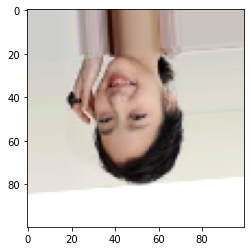

[0. 1. 0.]


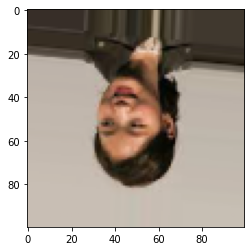

[0. 1. 0.]


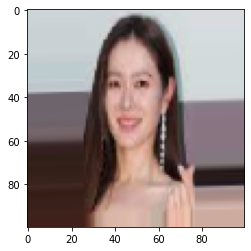

[0. 0. 1.]


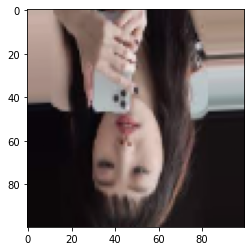

[0. 1. 0.]


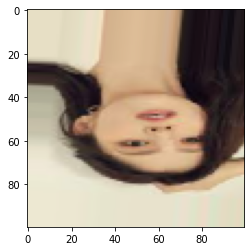

[1. 0. 0.]


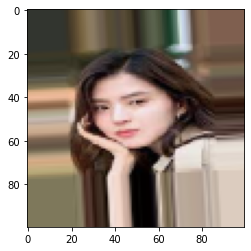

[1. 0. 0.]


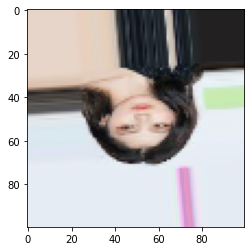

[1. 0. 0.]


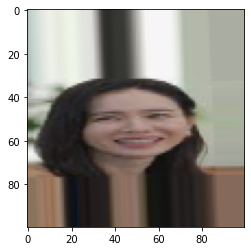

[0. 0. 1.]


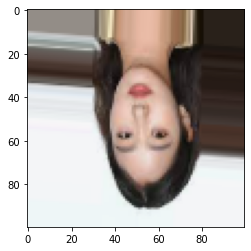

[0. 1. 0.]


In [7]:
import matplotlib.pyplot as plt
img_generator = img_datagen.flow_from_directory('./images',
                                                target_size=(100,100),
                                                batch_size=6)
count = 0
for img, label in img_generator:
    count += 1
    if count > 6:
        break
    for i in range(len(img)):
        #cv2.imwrite('./gen_images/img{}_{}.png'.format(count,i), img[i])
        plt.imshow(img[i])
        plt.savefig('./gen_images/img{}_{}.png'.format(count,i))
        plt.show()
        print(label[i])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(8, kernel_size=4, input_shape=(128,128,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 8)       392       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cp = ModelCheckpoint("./whois_best.hdf5", monitor='loss', save_best_only=True)
esc = EarlyStopping(monitor='loss', patience=30)
history = model.fit(img_datagen.flow_from_directory('./images',target_size=(128,128),batch_size=90), 
                    validation_data=img_datagen.flow_from_directory('./images',target_size=(128,128), batch_size=18),
                    epochs=1000, callbacks=[esc, cp])

Found 18 images belonging to 3 classes.
Found 18 images belonging to 3 classes.
Epoch 1/1000
1/1 [==============================] - 0s 429ms/step - loss: 1.0994 - accuracy: 0.3889 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/1000
1/1 [==============================] - 0s 165ms/step - loss: 1.0985 - accuracy: 0.3333 - val_loss: 1.0974 - val_accuracy: 0.1667
Epoch 3/1000
1/1 [==============================] - 0s 188ms/step - loss: 1.0982 - accuracy: 0.4444 - val_loss: 1.0967 - val_accuracy: 0.3333
Epoch 4/1000
1/1 [==============================] - 0s 164ms/step - loss: 1.0966 - accuracy: 0.3333 - val_loss: 1.0936 - val_accuracy: 0.3333
Epoch 5/1000
1/1 [==============================] - 0s 168ms/step - loss: 1.0946 - accuracy: 0.3333 - val_loss: 1.0943 - val_accuracy: 0.3333
Epoch 6/1000
1/1 [==============================] - 0s 183ms/step - loss: 1.0932 - accuracy: 0.3333 - val_loss: 1.0919 - val_accuracy: 0.3333
Epoch 7/1000
1/1 [==============================] - 0s 145ms/step - 

Epoch 58/1000
1/1 [==============================] - 0s 133ms/step - loss: 1.0197 - accuracy: 0.5000 - val_loss: 1.0196 - val_accuracy: 0.4444
Epoch 59/1000
1/1 [==============================] - 0s 150ms/step - loss: 1.0272 - accuracy: 0.4444 - val_loss: 1.0217 - val_accuracy: 0.5000
Epoch 60/1000
1/1 [==============================] - 0s 154ms/step - loss: 1.0273 - accuracy: 0.4444 - val_loss: 0.9938 - val_accuracy: 0.5000
Epoch 61/1000
1/1 [==============================] - 0s 131ms/step - loss: 0.9998 - accuracy: 0.4444 - val_loss: 1.0041 - val_accuracy: 0.5000
Epoch 62/1000
1/1 [==============================] - 0s 147ms/step - loss: 1.0262 - accuracy: 0.4444 - val_loss: 0.9863 - val_accuracy: 0.5556
Epoch 63/1000
1/1 [==============================] - 0s 130ms/step - loss: 1.0101 - accuracy: 0.5556 - val_loss: 0.9880 - val_accuracy: 0.5556
Epoch 64/1000
1/1 [==============================] - 0s 158ms/step - loss: 1.0023 - accuracy: 0.5000 - val_loss: 0.9872 - val_accuracy: 0.5556

1/1 [==============================] - 0s 137ms/step - loss: 0.9585 - accuracy: 0.4444 - val_loss: 1.0489 - val_accuracy: 0.3889
Epoch 116/1000
1/1 [==============================] - 0s 150ms/step - loss: 0.9491 - accuracy: 0.4444 - val_loss: 0.9673 - val_accuracy: 0.5000
Epoch 117/1000
1/1 [==============================] - 0s 160ms/step - loss: 0.9259 - accuracy: 0.5000 - val_loss: 0.8215 - val_accuracy: 0.5000
Epoch 118/1000
1/1 [==============================] - 0s 138ms/step - loss: 0.8661 - accuracy: 0.4444 - val_loss: 0.8716 - val_accuracy: 0.5556
Epoch 119/1000
1/1 [==============================] - 0s 136ms/step - loss: 0.8965 - accuracy: 0.5000 - val_loss: 0.8109 - val_accuracy: 0.6667
Epoch 120/1000
1/1 [==============================] - 0s 133ms/step - loss: 0.8762 - accuracy: 0.6111 - val_loss: 0.8823 - val_accuracy: 0.7222
Epoch 121/1000
1/1 [==============================] - 0s 138ms/step - loss: 0.9020 - accuracy: 0.6667 - val_loss: 0.8062 - val_accuracy: 0.6111
Epoch 1

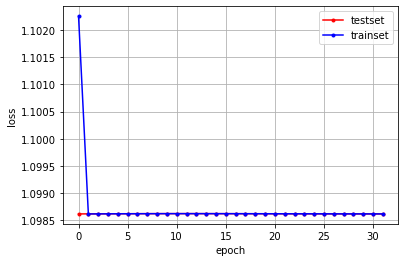

In [10]:
import numpy as np
import matplotlib.pyplot as plt
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c='red', label='testset')
plt.plot(x_len, y_loss, marker=".", c='blue', label='trainset')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

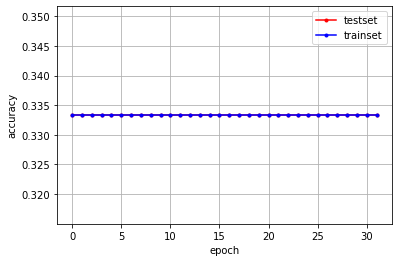

In [11]:
y_vloss = history.history['val_accuracy']
y_loss = history.history['accuracy']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c='red', label='testset')
plt.plot(x_len, y_loss, marker=".", c='blue', label='trainset')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()